In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle

In [2]:
path = r"C:\Users\Arifin\Downloads\papaya\Combined_Leaf&Fruit.csv"
df = pd.read_csv(path)
df = shuffle(df)
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
100,100,2.886933,4.400415,2.758104,4.244306,0.644268,0.579012,0.639661,0.593431,0.182182,0.166673,0.179796,0.168091,0.905887,0.856556,0.910143,0.861650,Leaf Papaya Ringspot
138,138,4.261994,5.221945,4.025567,5.904760,0.596471,0.566428,0.606083,0.558320,0.162359,0.157156,0.164493,0.155654,0.887500,0.862098,0.893770,0.844057,Leaf Papaya Black Spot
223,223,2.491498,3.970150,3.005147,3.919785,0.884423,0.831520,0.866908,0.831144,0.516228,0.487783,0.506496,0.487582,0.895408,0.833099,0.873928,0.835217,Leaf Papaya Powdery Mildew
354,64,0.892601,1.433033,0.917647,1.409335,0.936143,0.893173,0.926871,0.896396,0.577802,0.548910,0.569811,0.551191,0.916347,0.865581,0.914585,0.867797,Fruit Ringspot
364,74,1.387010,2.575748,1.727451,2.331903,0.924672,0.861910,0.902388,0.871551,0.532846,0.498379,0.520315,0.503554,0.934209,0.877860,0.918077,0.889424,Fruit Powdery Mildew


In [3]:
df.shape

(406, 18)

In [4]:
df.describe()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000
mean,119.642857,2.280551,3.427080,2.308723,3.444539,0.783710,0.733924,0.782894,0.733448,0.380017,0.361710,0.378066,0.361796,0.901214,0.851756,0.900254,0.851090
std,82.993428,1.528579,1.997288,1.468656,2.012483,0.143051,0.152825,0.137752,0.153582,0.192999,0.189589,0.189943,0.189904,0.066530,0.086483,0.064781,0.087233
min,0.000000,0.237760,0.412626,0.263710,0.422268,0.443385,0.418674,0.441471,0.407525,0.108920,0.097947,0.100415,0.095287,0.613236,0.515019,0.635982,0.482207
25%,50.250000,1.116119,1.873495,1.175295,1.885855,0.652260,0.584210,0.648766,0.581552,0.161781,0.147753,0.164119,0.145248,0.859728,0.797126,0.866279,0.801508
50%,101.000000,1.926777,3.105852,1.875812,3.051050,0.818006,0.764929,0.816421,0.762033,0.448742,0.433658,0.458468,0.436694,0.918594,0.863575,0.909716,0.862553
75%,187.750000,3.266900,4.806163,3.245159,4.860173,0.924600,0.882448,0.912112,0.882361,0.548073,0.520619,0.539907,0.519355,0.948706,0.912885,0.947458,0.912323
max,289.000000,7.715732,10.384667,7.749449,10.185467,0.975367,0.953346,0.974582,0.951708,0.771433,0.765493,0.768943,0.765491,0.991926,0.986406,0.992110,0.988026


In [5]:
df = df.rename(columns={'16': 'Class'})
X = df.drop('Class',axis=1)
y = df['Class']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406 entries, 100 to 367
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  406 non-null    int64  
 1   0           406 non-null    float64
 2   1           406 non-null    float64
 3   2           406 non-null    float64
 4   3           406 non-null    float64
 5   4           406 non-null    float64
 6   5           406 non-null    float64
 7   6           406 non-null    float64
 8   7           406 non-null    float64
 9   8           406 non-null    float64
 10  9           406 non-null    float64
 11  10          406 non-null    float64
 12  11          406 non-null    float64
 13  12          406 non-null    float64
 14  13          406 non-null    float64
 15  14          406 non-null    float64
 16  15          406 non-null    float64
 17  Class       406 non-null    object 
dtypes: float64(16), int64(1), object(1)
memory usage: 60.3+ KB


Text(0.5, 1.0, 'Correlation between different fearures')

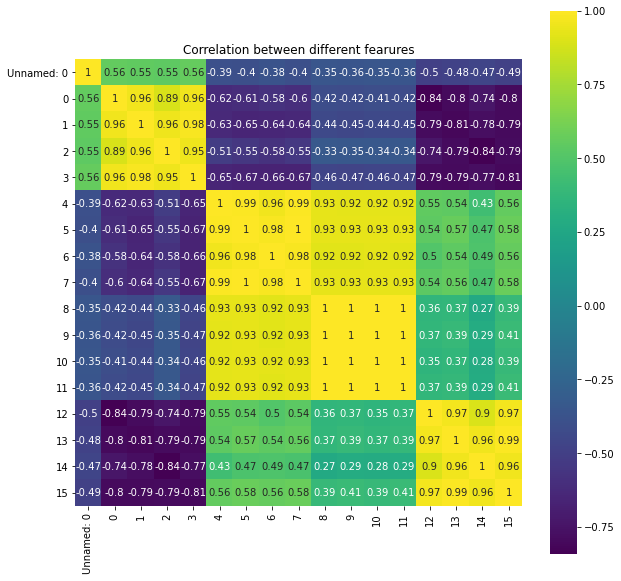

In [7]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation between different fearures')

In [8]:
X.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
100,100,2.886933,4.400415,2.758104,4.244306,0.644268,0.579012,0.639661,0.593431,0.182182,0.166673,0.179796,0.168091,0.905887,0.856556,0.910143,0.861650
138,138,4.261994,5.221945,4.025567,5.904760,0.596471,0.566428,0.606083,0.558320,0.162359,0.157156,0.164493,0.155654,0.887500,0.862098,0.893770,0.844057
223,223,2.491498,3.970150,3.005147,3.919785,0.884423,0.831520,0.866908,0.831144,0.516228,0.487783,0.506496,0.487582,0.895408,0.833099,0.873928,0.835217
354,64,0.892601,1.433033,0.917647,1.409335,0.936143,0.893173,0.926871,0.896396,0.577802,0.548910,0.569811,0.551191,0.916347,0.865581,0.914585,0.867797
364,74,1.387010,2.575748,1.727451,2.331903,0.924672,0.861910,0.902388,0.871551,0.532846,0.498379,0.520315,0.503554,0.934209,0.877860,0.918077,0.889424


In [9]:
y.head()

100          Leaf Papaya Ringspot
138        Leaf Papaya Black Spot
223    Leaf Papaya Powdery Mildew
354                Fruit Ringspot
364          Fruit Powdery Mildew
Name: Class, dtype: object

# Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler,MaxAbsScaler
  
scaler = MaxAbsScaler()

X = scaler.fit_transform(X)

X = pd.DataFrame(X)

In [11]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.346021,0.374162,0.423742,0.355910,0.416702,0.660540,0.607347,0.656344,0.623543,0.236160,0.217732,0.233823,0.219585,0.913261,0.868360,0.917381,0.872092
1,0.477509,0.552377,0.502851,0.519465,0.579724,0.611536,0.594148,0.621891,0.586650,0.210465,0.205300,0.213921,0.203338,0.894724,0.873979,0.900878,0.854286
2,0.771626,0.322911,0.382309,0.387789,0.384841,0.906759,0.872212,0.889518,0.873318,0.669180,0.637214,0.658692,0.636954,0.902696,0.844580,0.880878,0.845339
3,0.221453,0.115686,0.137995,0.118414,0.138367,0.959786,0.936883,0.951045,0.941881,0.748998,0.717067,0.741031,0.720049,0.923806,0.877509,0.921859,0.878314
4,0.256055,0.179764,0.248034,0.222913,0.228944,0.948025,0.904090,0.925924,0.915775,0.690722,0.651056,0.676662,0.657818,0.941813,0.889958,0.925378,0.900202


In [12]:
from sklearn.model_selection import train_test_split
  
X_train, X_test, y_train, y_test = train_test_split(
      X, y , test_size = 0.25, random_state=None)

X_train.shape, X_test.shape


((304, 17), (102, 17))

In [13]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
134,0.605536,0.431337,0.401022,0.337117,0.403578,0.575824,0.551459,0.643417,0.557579,0.194051,0.185236,0.214675,0.187182,0.764397,0.706036,0.816589,0.708852
49,0.757785,0.264881,0.249906,0.199651,0.247799,0.946946,0.953897,0.963710,0.959360,0.805176,0.803108,0.815891,0.804514,0.949285,0.938729,0.963430,0.939246
316,0.269896,0.154828,0.208085,0.194574,0.198602,0.957620,0.925023,0.938042,0.932946,0.698553,0.666430,0.686351,0.670691,0.952217,0.912084,0.937386,0.917071
164,0.750865,0.633188,0.586435,0.584539,0.612645,0.811094,0.786932,0.826513,0.785360,0.609011,0.588051,0.620234,0.586495,0.794380,0.745675,0.810015,0.737851
241,0.096886,0.123062,0.148754,0.136063,0.152895,0.969214,0.954833,0.962439,0.956689,0.726791,0.704385,0.722899,0.704552,0.953902,0.925029,0.947724,0.922820


# Model training

## KNN

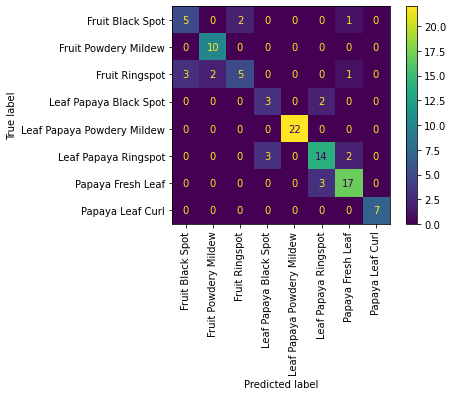

In [14]:
# Remember that we are trying to come up
# with a model to predict whether
# someone will TARGET CLASS or not.
# We'll start with k = 1.

from sklearn.neighbors import KNeighborsClassifier
  
knn = KNeighborsClassifier(n_neighbors = 1)
  
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

plot_confusion_matrix(knn, X_test, y_test)
plt.xticks(rotation = 90)
plt.show()

# Predictions and Evaluations
# Let's evaluate our KNN model ! 


In [15]:
from sklearn.metrics import classification_report  
print(classification_report(y_test, pred))


                            precision    recall  f1-score   support

          Fruit Black Spot       0.62      0.62      0.62         8
      Fruit Powdery Mildew       0.83      1.00      0.91        10
            Fruit Ringspot       0.71      0.45      0.56        11
    Leaf Papaya Black Spot       0.50      0.60      0.55         5
Leaf Papaya Powdery Mildew       1.00      1.00      1.00        22
      Leaf Papaya Ringspot       0.74      0.74      0.74        19
         Papaya Fresh Leaf       0.81      0.85      0.83        20
          Papaya Leaf Curl       1.00      1.00      1.00         7

                  accuracy                           0.81       102
                 macro avg       0.78      0.78      0.78       102
              weighted avg       0.81      0.81      0.81       102



In [16]:
from sklearn import metrics
error_rate = []
scores = []

k=50
max_accuracy=0
best_k=1

for i in range(1, k):
      
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    y_predict = knn.predict(X_test)
    curr_accuracy=metrics.accuracy_score(y_test,y_predict)
    if curr_accuracy>max_accuracy:
        max_accuracy=curr_accuracy
        best_k=i
    scores.append(curr_accuracy)
  


Text(0, 0.5, 'Error Rate')

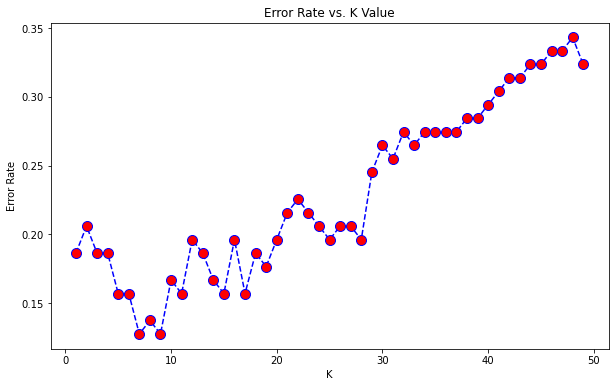

In [17]:
plt.figure(figsize =(10, 6))
plt.plot(range(1, k), error_rate, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)
  
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Text(0, 0.5, 'Accuracy')

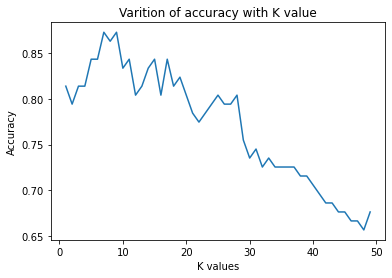

In [18]:
plt.plot(np.arange(1,k),scores)
plt.title('Varition of accuracy with K value')
plt.xlabel('K values')
plt.ylabel('Accuracy')

In [19]:
knn = KNeighborsClassifier(n_neighbors = best_k)
  
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
from sklearn.metrics import classification_report  
print(classification_report(y_test, pred))

print("Accuracy for k = {} is {}%".format(best_k,max_accuracy*100))

                            precision    recall  f1-score   support

          Fruit Black Spot       0.86      0.75      0.80         8
      Fruit Powdery Mildew       0.82      0.90      0.86        10
            Fruit Ringspot       0.70      0.64      0.67        11
    Leaf Papaya Black Spot       0.80      0.80      0.80         5
Leaf Papaya Powdery Mildew       1.00      1.00      1.00        22
      Leaf Papaya Ringspot       0.78      0.95      0.86        19
         Papaya Fresh Leaf       0.94      0.80      0.86        20
          Papaya Leaf Curl       1.00      1.00      1.00         7

                  accuracy                           0.87       102
                 macro avg       0.86      0.85      0.86       102
              weighted avg       0.88      0.87      0.87       102

Accuracy for k = 7 is 87.25490196078431%


## SVM

In [20]:
from sklearn.svm import SVC
svm_model= SVC()
tuned_parameters = {
 'C': (np.arange(1,30)) , 'kernel': ['linear'],
 'C': (np.arange(1,30)) ,  'kernel': ['rbf'],
 'C':(np.arange(1,30)) , 'kernel':['poly']
                   }
from sklearn.model_selection import GridSearchCV

model_svm = GridSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy')

model_svm.fit(X_train,y_train)
print('best hyperlink parameters')
print(model_svm.best_params_)
y_pred= model_svm.predict(X_test)
print('Accuracy Score:')

print(classification_report(y_test, y_pred))

best hyperlink parameters
{'C': 4, 'kernel': 'poly'}
Accuracy Score:
                            precision    recall  f1-score   support

          Fruit Black Spot       1.00      0.88      0.93         8
      Fruit Powdery Mildew       0.90      0.90      0.90        10
            Fruit Ringspot       0.83      0.91      0.87        11
    Leaf Papaya Black Spot       0.80      0.80      0.80         5
Leaf Papaya Powdery Mildew       1.00      1.00      1.00        22
      Leaf Papaya Ringspot       0.89      0.84      0.86        19
         Papaya Fresh Leaf       0.90      0.95      0.93        20
          Papaya Leaf Curl       1.00      1.00      1.00         7

                  accuracy                           0.92       102
                 macro avg       0.92      0.91      0.91       102
              weighted avg       0.92      0.92      0.92       102



In [21]:
print('Model accuracy score: {0:0.4f}%'. format(accuracy_score(y_pred,y_test)*100))

Model accuracy score: 92.1569%


## Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB,CategoricalNB

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(classification_report(y_test, y_pred))



                            precision    recall  f1-score   support

          Fruit Black Spot       0.67      0.50      0.57         8
      Fruit Powdery Mildew       0.80      0.80      0.80        10
            Fruit Ringspot       0.55      0.55      0.55        11
    Leaf Papaya Black Spot       0.75      0.60      0.67         5
Leaf Papaya Powdery Mildew       1.00      1.00      1.00        22
      Leaf Papaya Ringspot       0.75      0.79      0.77        19
         Papaya Fresh Leaf       0.68      0.75      0.71        20
          Papaya Leaf Curl       1.00      1.00      1.00         7

                  accuracy                           0.78       102
                 macro avg       0.77      0.75      0.76       102
              weighted avg       0.78      0.78      0.78       102



In [23]:
print('Model accuracy score: {0:0.4f}%'. format(accuracy_score(y_test, y_pred)*100))

Model accuracy score: 78.4314%


## Logistic regression

In [24]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs', max_iter=1000)

# fit the model
lr.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print(classification_report(y_test, y_pred))


                            precision    recall  f1-score   support

          Fruit Black Spot       0.67      0.50      0.57         8
      Fruit Powdery Mildew       0.80      0.80      0.80        10
            Fruit Ringspot       0.55      0.55      0.55        11
    Leaf Papaya Black Spot       0.75      0.60      0.67         5
Leaf Papaya Powdery Mildew       1.00      1.00      1.00        22
      Leaf Papaya Ringspot       0.75      0.79      0.77        19
         Papaya Fresh Leaf       0.68      0.75      0.71        20
          Papaya Leaf Curl       1.00      1.00      1.00         7

                  accuracy                           0.78       102
                 macro avg       0.77      0.75      0.76       102
              weighted avg       0.78      0.78      0.78       102



In [25]:
print('Model accuracy score: {0:0.4f}%'. format(accuracy_score(y_test, y_pred)*100))

Model accuracy score: 78.4314%


# K-Fold Cross Validation

In [26]:
from sklearn.model_selection import KFold, StratifiedKFold

kf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1


Fold:1, Train set: 304, Test set:102
Fold:2, Train set: 304, Test set:102
Fold:3, Train set: 305, Test set:101
Fold:4, Train set: 305, Test set:101


In [27]:
score = cross_val_score(lr, X, y, cv= kf, scoring="accuracy")
print('Scores for each fold are:')
print(score)
print('Model accuracy score for Logistic Regression: {0:0.4f}%'.format(score.mean()*100))

Scores for each fold are:
[0.76470588 0.68627451 0.67326733 0.75247525]
Model accuracy score for Logistic Regression: 71.9181%


In [28]:
score = cross_val_score(gnb, X, y, cv= kf, scoring="accuracy")
print('Scores for each fold are:')
print(score)
print('Model accuracy score for Gaussian Naive Bayes: {0:0.4f}%'.format(score.mean()*100))

Scores for each fold are:
[0.80392157 0.83333333 0.83168317 0.83168317]
Model accuracy score for Gaussian Naive Bayes: 82.5155%
